<a href="https://colab.research.google.com/github/ajinkyajumde/Principal-Component-Analysis-on-bike-sharing-dataset/blob/main/COMPANY_BANKRUPTCY_PREDICTION_with_PCA_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Prediction of bankruptcy is a phenomenon of increasing interest to firms who
stand to loose money because on unpaid debts. Since computers can store huge dataset
pertaining to bankruptcy making accurate predictions from them before hand is becoming
important. 

The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

 In this project you will use various classification algorithms on bankruptcy
dataset to predict bankruptcies with satisfying accuracies long before the actual event.

# **Attribute Information**

Updated column names and description to make the data easier to understand (Y = Output feature, X = Input features)

Y - Bankrupt?: Class label 1 : Yes , 0: No 

X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)

X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)

X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)

X4 - Operating Gross Margin: Gross Profit/Net Sales

X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales

X6 - Operating Profit Rate: Operating Income/Net Sales

X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales

X8 - After-tax net Interest Rate: Net Income/Net Sales

X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio

X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales

X11 - Operating Expense Rate: Operating Expenses/Net Sales

X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales

X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities

X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity

X15 - Tax rate (A): Effective Tax Rate

X16 - Net Value Per Share (B): Book Value Per Share(B)

X17 - Net Value Per Share (A): Book Value Per Share(A)

X18 - Net Value Per Share (C): Book Value Per Share(C)

X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income

X20 - Cash Flow Per Share

X21 - Revenue Per Share (Yuan ¥): Sales Per Share

X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share

X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share

X24 - Realized Sales Gross Profit Growth Rate

X25 - Operating Profit Growth Rate: Operating Income Growth

X26 - After-tax Net Profit Growth Rate: Net Income Growth

X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth

X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth

X29 - Total Asset Growth Rate: Total Asset Growth

X30 - Net Value Growth Rate: Total Equity Growth

X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth

X32 - Cash Reinvestment %: Cash Reinvestment Ratio

X33 - Current Ratio

X34 - Quick Ratio: Acid Test

X35 - Interest Expense Ratio: Interest Expenses/Total Revenue

X36 - Total debt/Total net worth: Total Liability/Equity Ratio

X37 - Debt ratio %: Liability/Total Assets

X38 - Net worth/Assets: Equity/Total Assets

X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets

X40 - Borrowing dependency: Cost of Interest-bearing Debt

X41 - Contingent liabilities/Net worth: Contingent Liability/Equity

X42 - Operating profit/Paid-in capital: Operating Income/Capital

X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital

X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity

X45 - Total Asset Turnover

X46 - Accounts Receivable Turnover

X47 - Average Collection Days: Days Receivable Outstanding

X48 - Inventory Turnover Rate (times)

X49 - Fixed Assets Turnover Frequency

X50 - Net Worth Turnover Rate (times): Equity Turnover

X51 - Revenue per person: Sales Per Employee

X52 - Operating profit per person: Operation Income Per Employee

X53 - Allocation rate per person: Fixed Assets Per Employee

X54 - Working Capital to Total Assets

X55 - Quick Assets/Total Assets

X56 - Current Assets/Total Assets

X57 - Cash/Total Assets

X58 - Quick Assets/Current Liability

X59 - Cash/Current Liability

X60 - Current Liability to Assets

X61 - Operating Funds to Liability

X62 - Inventory/Working Capital

X63 - Inventory/Current Liability

X64 - Current Liabilities/Liability

X65 - Working Capital/Equity

X66 - Current Liabilities/Equity

X67 - Long-term Liability to Current Assets

X68 - Retained Earnings to Total Assets

X69 - Total income/Total expense

X70 - Total expense/Assets

X71 - Current Asset Turnover Rate: Current Assets to Sales

X72 - Quick Asset Turnover Rate: Quick Assets to Sales

X73 - Working capitcal Turnover Rate: Working Capital to Sales

X74 - Cash Turnover Rate: Cash to Sales

X75 - Cash Flow to Sales

X76 - Fixed Assets to Assets

X77 - Current Liability to Liability

X78 - Current Liability to Equity

X79 - Equity to Long-term Liability

X80 - Cash Flow to Total Assets

X81 - Cash Flow to Liability

X82 - CFO to Assets

X83 - Cash Flow to Equity

X84 - Current Liability to Current Assets

X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise

X86 - Net Income to Total Assets

X87 - Total assets to GNP price

X88 - No-credit Interval

X89 - Gross Profit to Sales

X90 - Net Income to Stockholder's Equity

X91 - Liability to Equity

X92 - Degree of Financial Leverage (DFL)

X93 - Interest Coverage Ratio (Interest expense to EBIT)

X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise

X95 - Equity to Liability

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data='/content/drive/MyDrive/Almabetter projects/COMPANY BANKRUPTCY/COMPANY BANKRUPTCY PREDICTION.csv'
dataset=pd.read_csv(data)

In [4]:
dataset.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
dataset.tail(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [6]:
dataset.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [7]:
dataset.shape

(6819, 96)

In [8]:
features=list(dataset.describe(include='all'))

In [9]:
numeric_features=list(dataset.describe())

In [10]:
numeric_features

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

In [11]:
non_numeric_features=[]
for i in features  :
  if i not in numeric_features:

    non_numeric_features.append(i)
  else:
    pass

In [12]:
non_numeric_features

[]

In [13]:
dataset['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

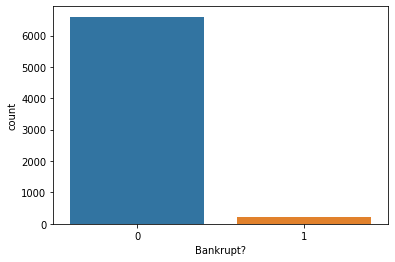

In [14]:
sns.countplot(x=dataset['Bankrupt?'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

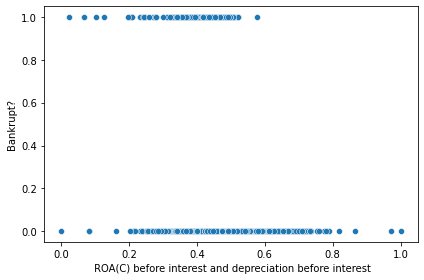

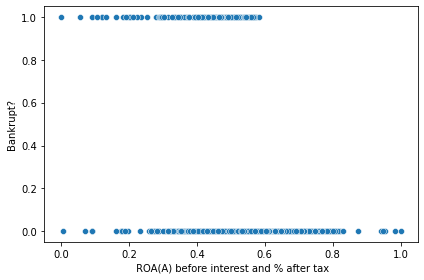

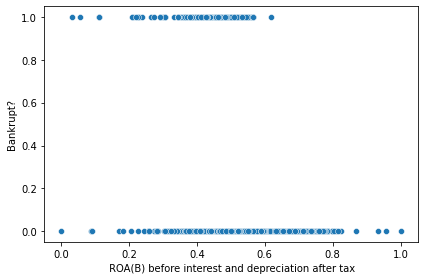

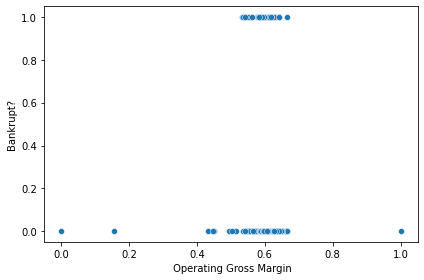

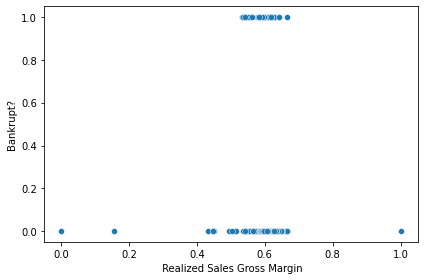

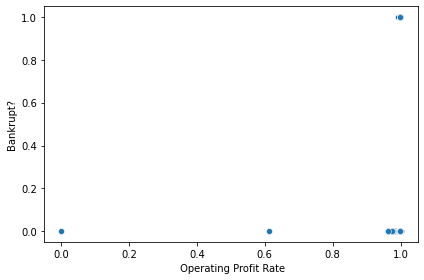

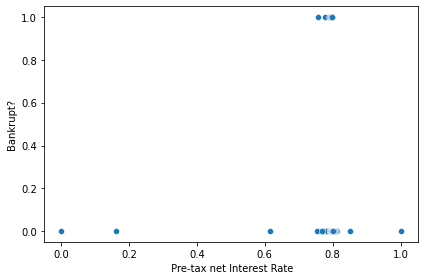

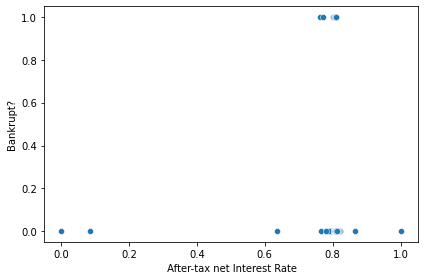

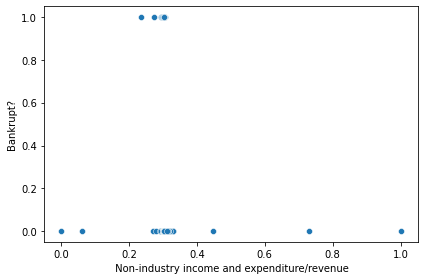

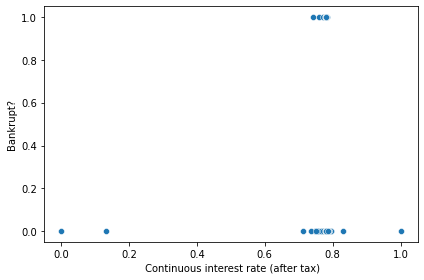

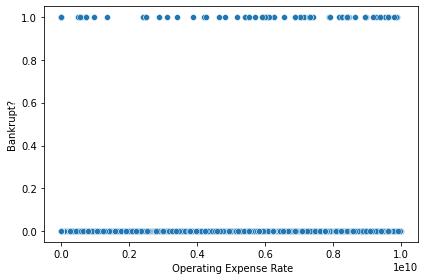

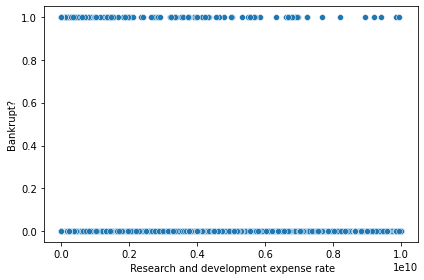

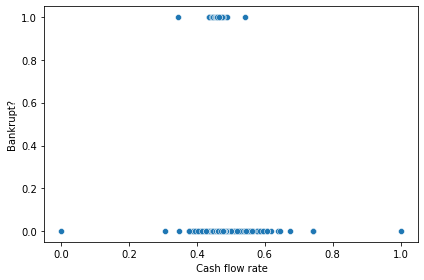

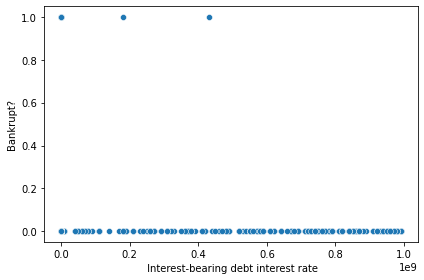

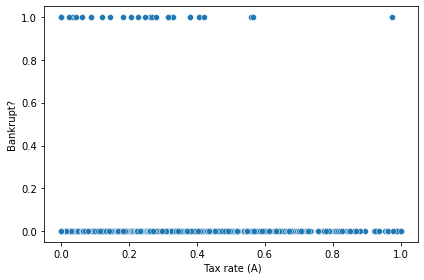

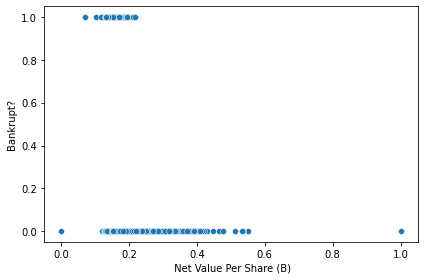

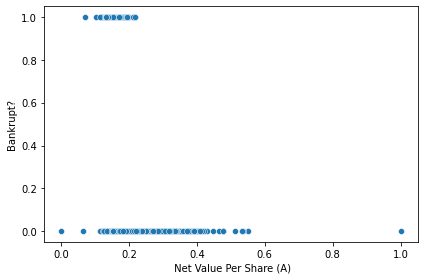

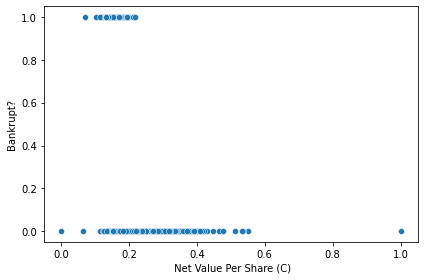

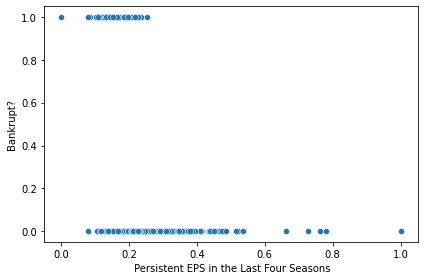

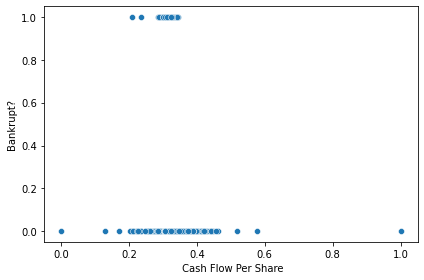

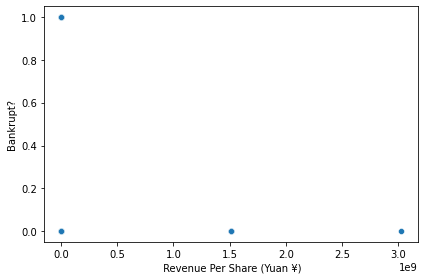

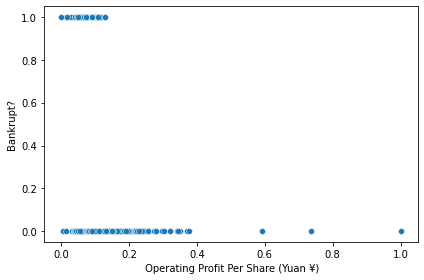

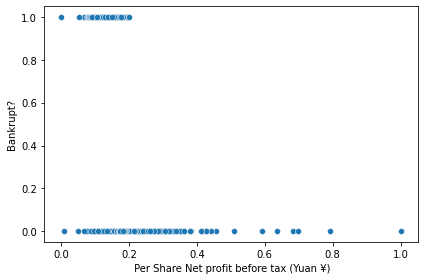

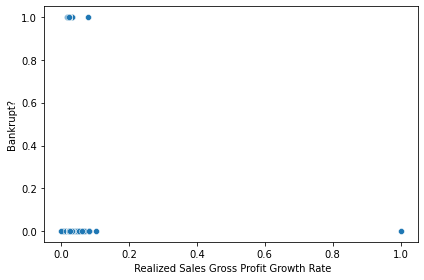

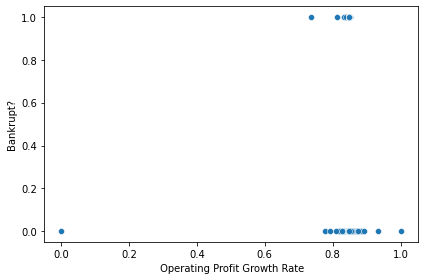

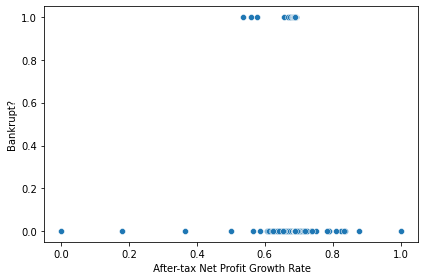

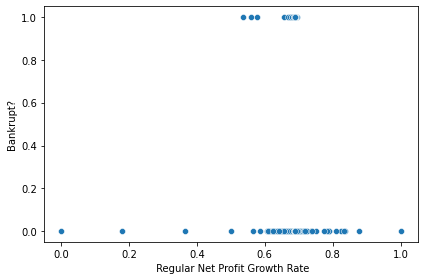

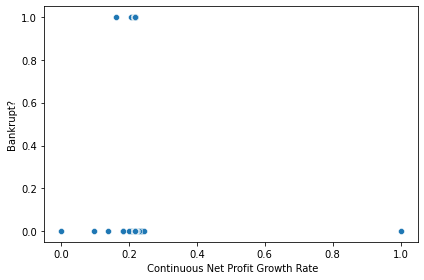

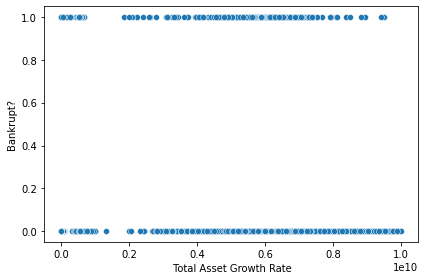

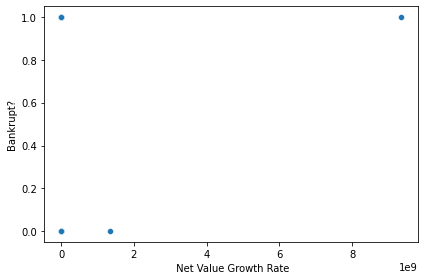

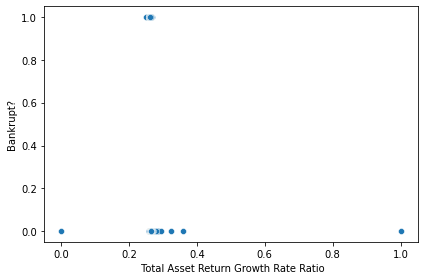

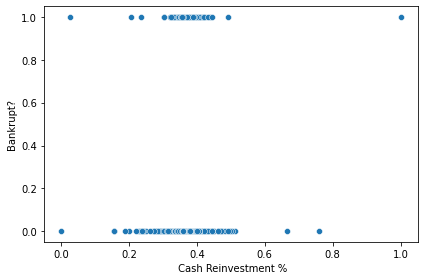

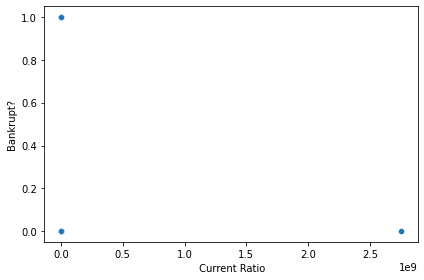

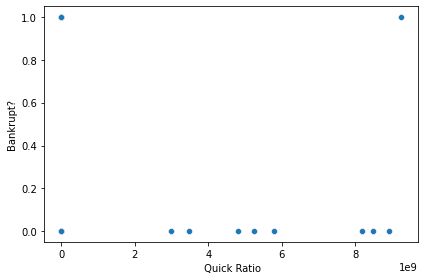

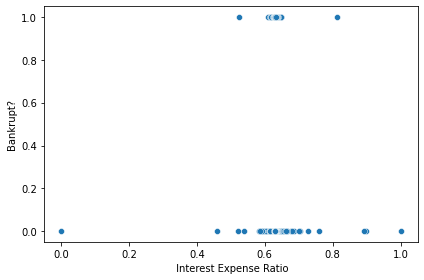

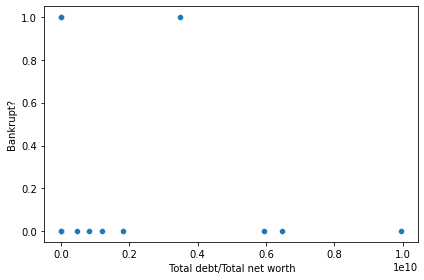

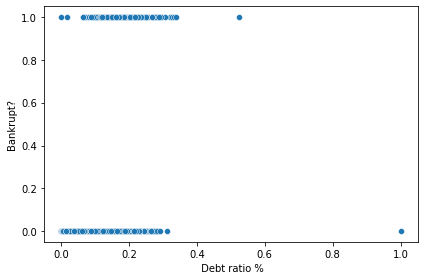

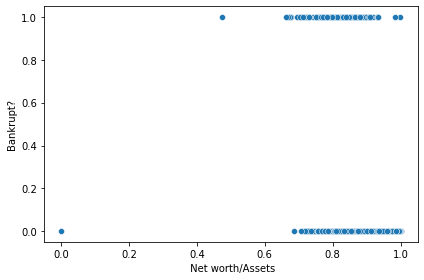

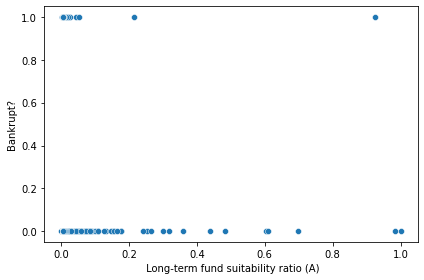

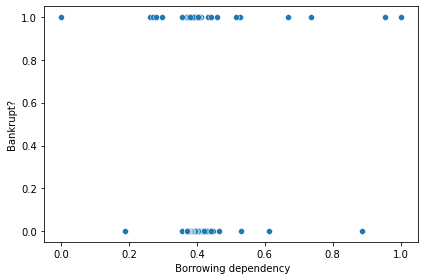

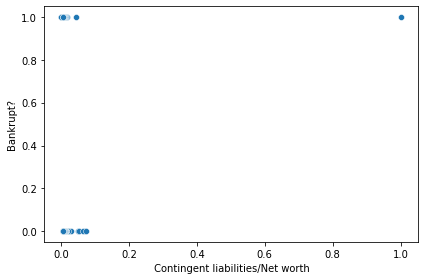

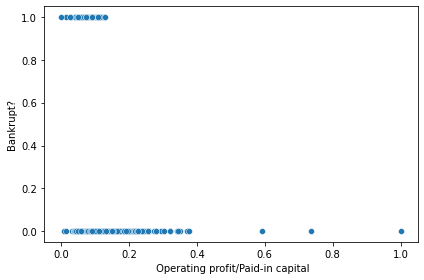

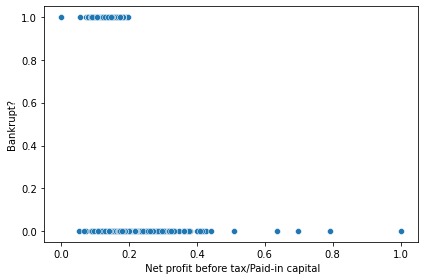

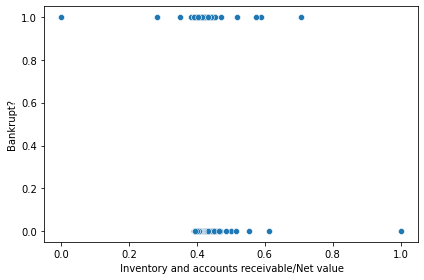

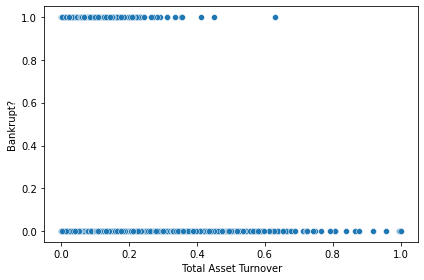

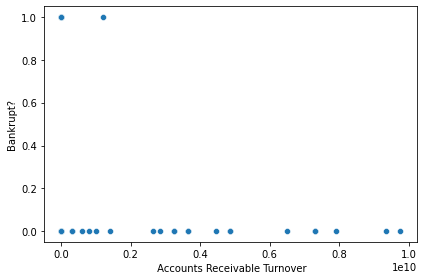

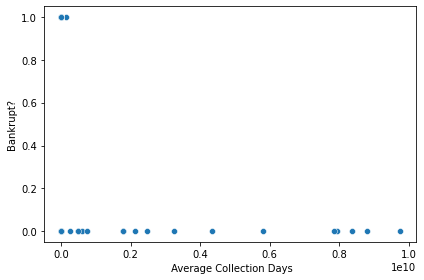

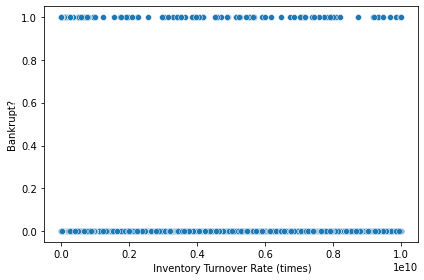

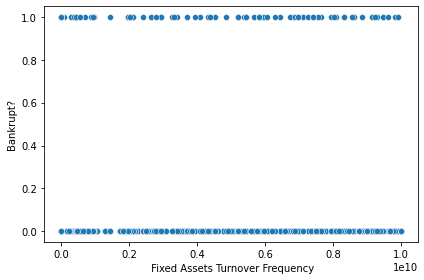

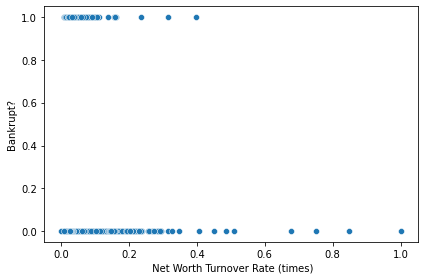

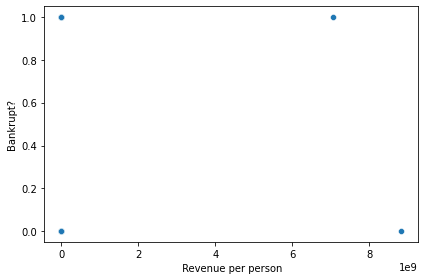

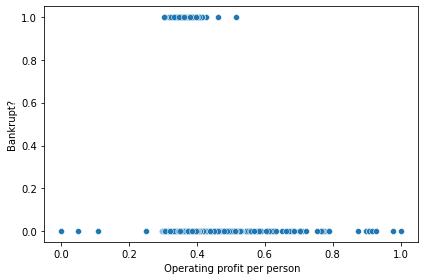

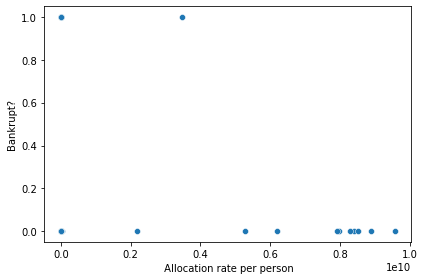

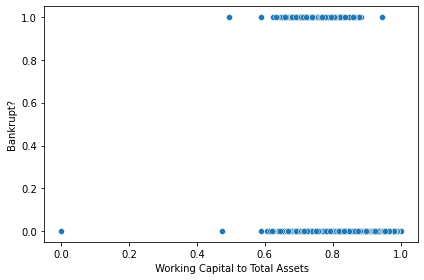

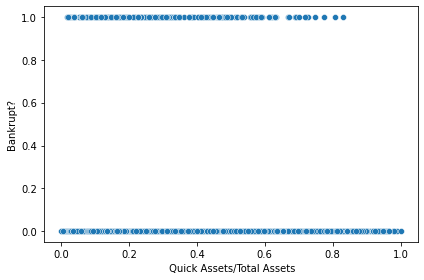

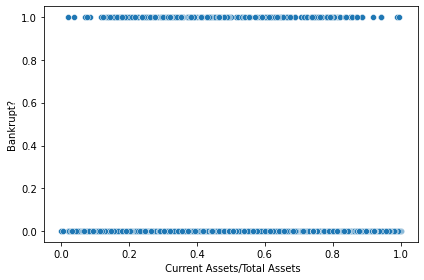

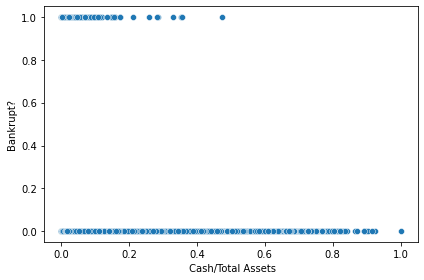

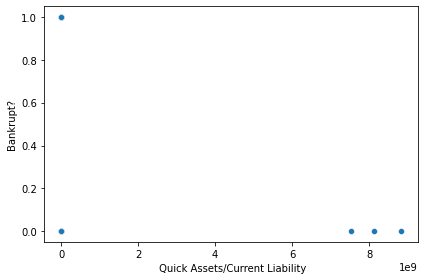

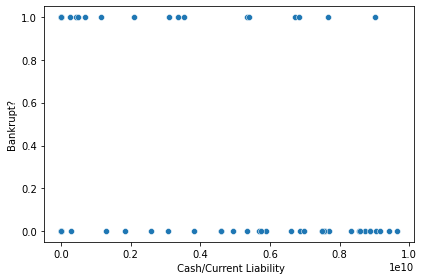

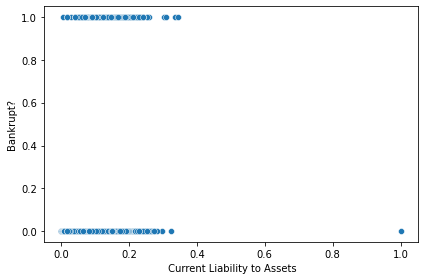

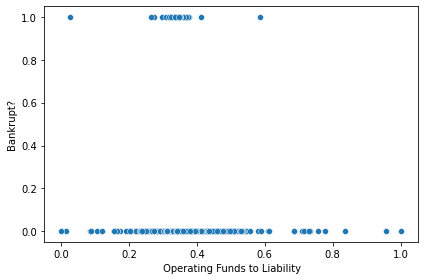

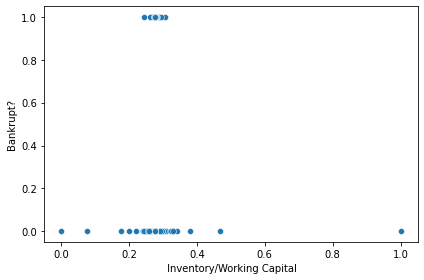

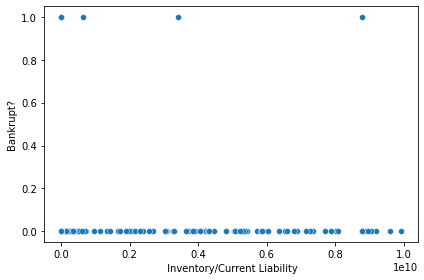

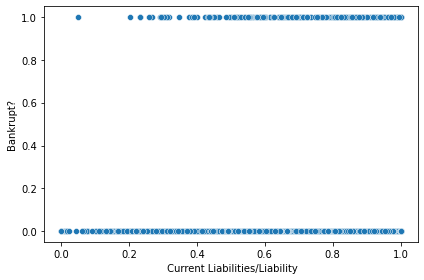

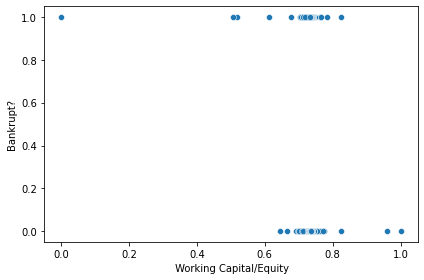

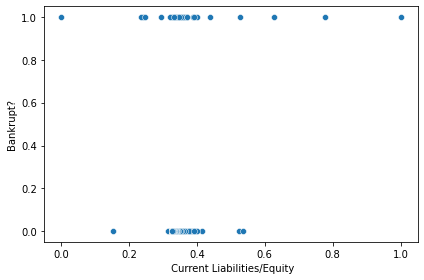

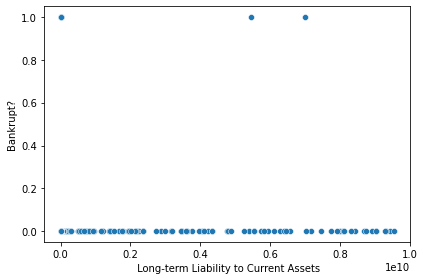

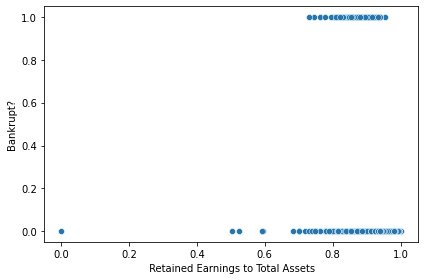

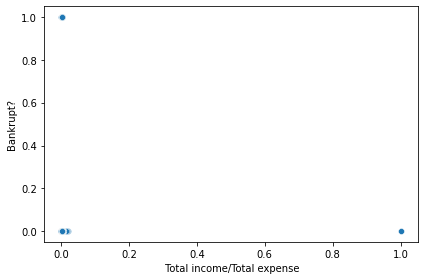

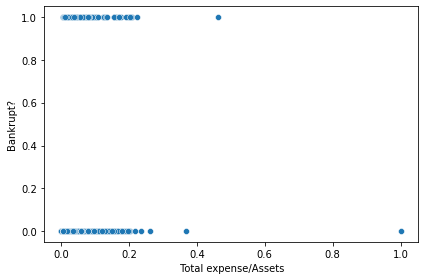

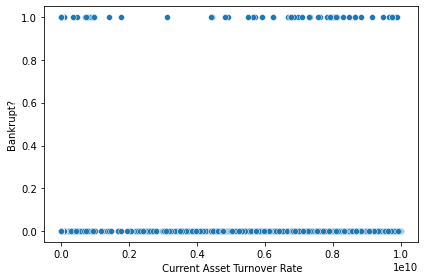

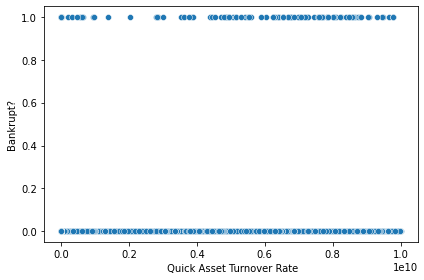

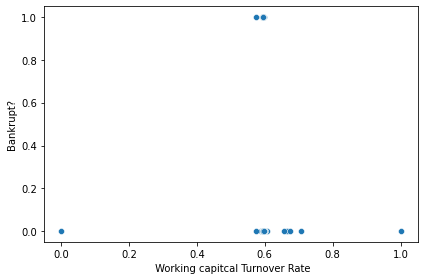

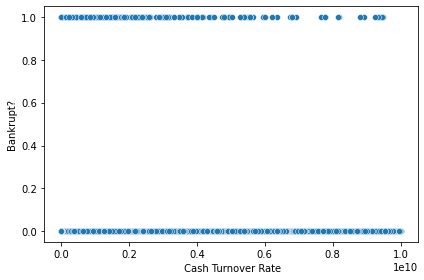

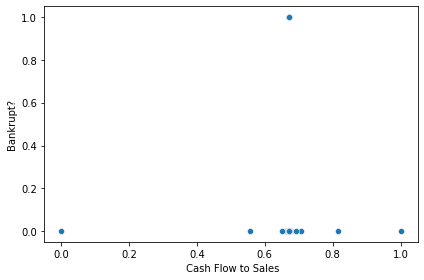

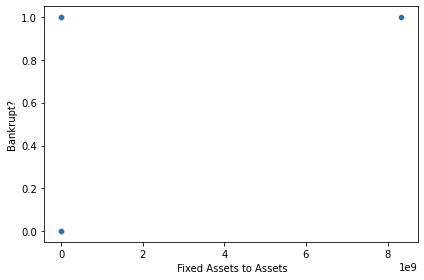

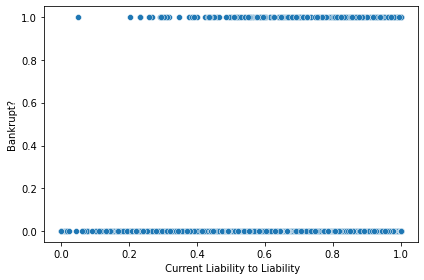

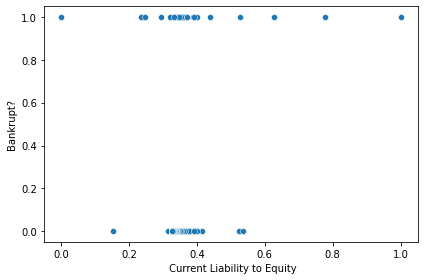

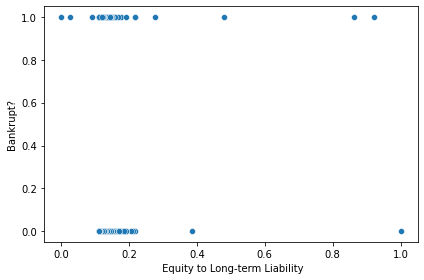

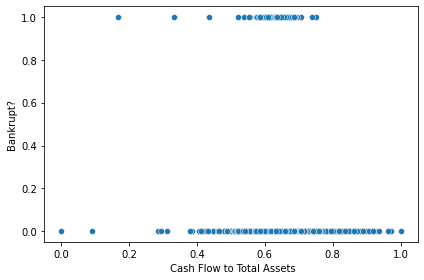

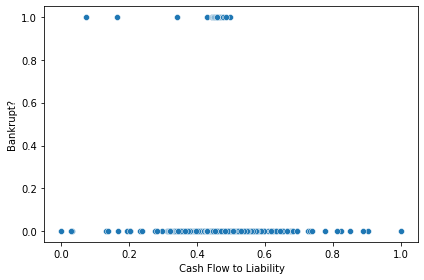

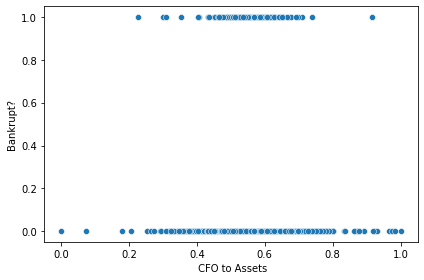

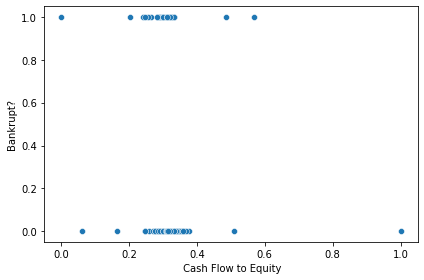

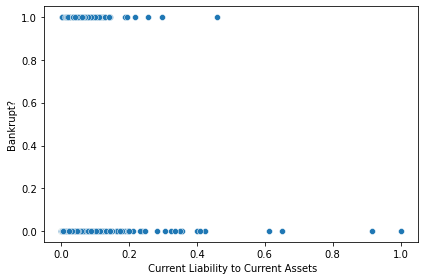

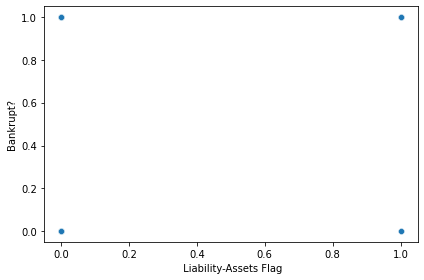

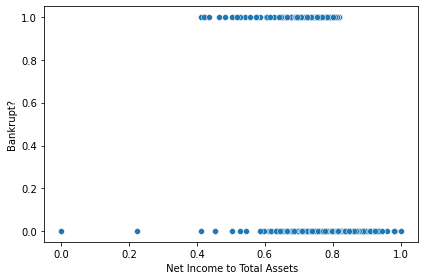

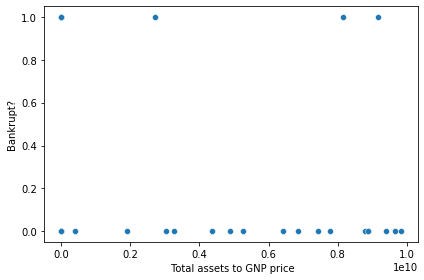

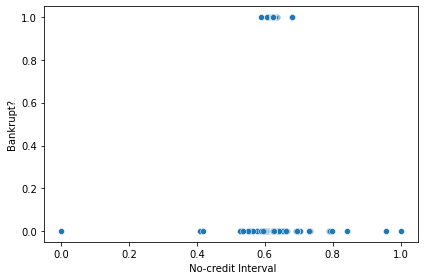

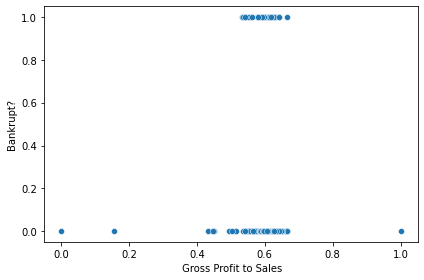

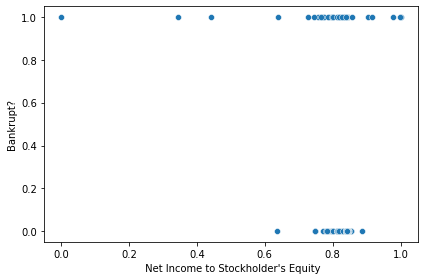

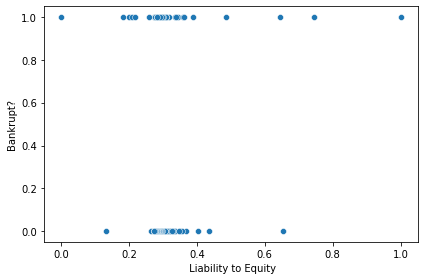

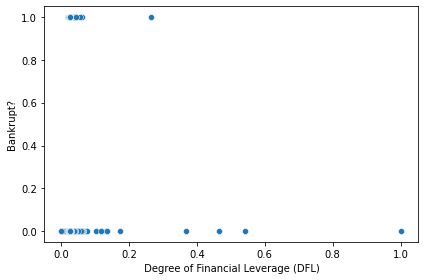

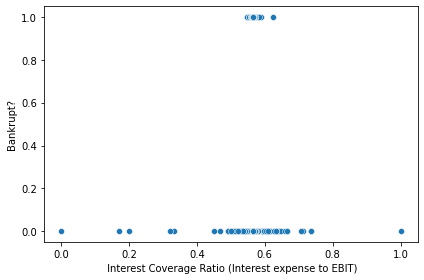

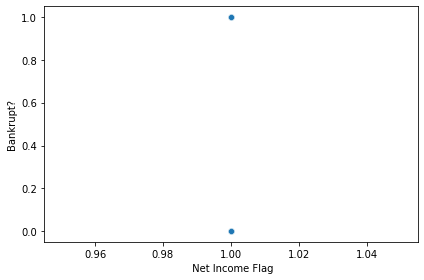

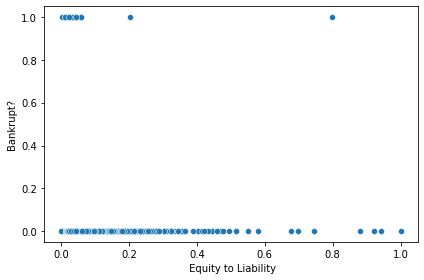

In [15]:
for x in numeric_features:
  if x!='Bankrupt?':
    plt.figure(figsize=(6,4))
    
    sns.scatterplot(x=dataset[x],y=dataset['Bankrupt?'])
    plt.tight_layout()
plt.show()

In [16]:
dataset[' Liability-Assets Flag'].value_counts()

0    6811
1       8
Name:  Liability-Assets Flag, dtype: int64

In [17]:
dataset[' Net Income Flag'].value_counts()

1    6819
Name:  Net Income Flag, dtype: int64

In [18]:
dataset.drop(columns=[' Net Income Flag',' Liability-Assets Flag'],inplace=True)

In [19]:
dataset.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [20]:
dataset.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,0.171306,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,-0.160725,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,-0.195673,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,-0.162572,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,-0.132650,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Net Income to Stockholder's Equity,-0.180987,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,...,-0.070354,0.328492,-0.040217,0.000127,0.075303,1.000000,-0.791836,-0.000093,0.005147,0.029622
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,0.132372,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,0.022033,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.007652,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,-0.008339


In [21]:
dataset['ROI'] = dataset[[' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax']].mean(axis=1)

In [22]:
dataset['ROI'].head()

0    0.400244
1    0.506412
2    0.465795
3    0.436281
4    0.508584
Name: ROI, dtype: float64

In [23]:
dataset.drop(columns=[' Realized Sales Gross Margin',' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax'],inplace=True)

In [24]:
dataset.corr()

,Bankrupt?,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,ROI
Bankrupt?,1.000000,-0.100043,-0.000230,-0.008517,-0.008857,-0.016593,-0.008395,-0.006083,-0.024232,-0.072356,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,-0.083048,-0.276224
Operating Gross Margin,-0.100043,1.000000,0.005745,0.032493,0.027175,0.051438,0.029430,-0.206353,-0.016976,0.341188,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029,0.336166
Operating Profit Rate,-0.000230,0.005745,1.000000,0.916448,0.862191,-0.592006,0.915544,0.013246,0.016387,0.023051,...,0.028482,-0.003338,0.000199,0.005746,0.006216,0.001541,0.000935,0.000393,-0.017071,0.034737
Pre-tax net Interest Rate,-0.008517,0.032493,0.916448,1.000000,0.986379,-0.220045,0.993617,0.014247,0.016836,0.024950,...,0.048587,-0.004243,-0.000075,0.032494,0.011343,-0.004043,0.000855,0.000984,-0.014559,0.054276
After-tax net Interest Rate,-0.008857,0.027175,0.862191,0.986379,1.000000,-0.115211,0.984452,0.013982,0.016521,0.022813,...,0.045390,-0.003786,-0.001091,0.027176,0.010648,-0.004390,0.000927,0.000957,-0.010900,0.050217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.085434,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,0.034809,-0.035363,-0.080773,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,-0.159654,-0.144386
Degree of Financial Leverage (DFL),0.010508,-0.011806,0.000935,0.000855,0.000927,-0.000556,0.000774,0.013577,-0.013945,-0.006348,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,-0.016739,-0.014372
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,-0.001167,0.000393,0.000984,0.000957,0.001024,0.000798,0.006232,-0.012160,0.001262,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,-0.008339,0.012005
Equity to Liability,-0.083048,0.120029,-0.017071,-0.014559,-0.010900,0.012293,-0.011299,-0.120763,-0.045244,0.331710,...,0.073916,0.014871,0.050609,0.120027,0.029622,-0.159654,-0.016739,-0.008339,1.000000,0.056392


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [79]:
X=dataset.drop(columns=['Bankrupt?'], axis=1)

In [80]:
#Apply Standard Scaling
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-0.383334,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.545256,-0.151921,...,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067,-2.247506
1,0.135068,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.326632,-0.151921,...,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573,-0.529475
2,-0.383759,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.616334,-0.740898,-0.523098,-0.151921,...,-0.820510,-0.049491,-0.005984,-0.383698,-0.249820,0.679247,-0.062961,-0.125015,-0.621960,-1.186746
3,-1.441418,-0.004257,-0.017313,-0.008676,-0.024491,-0.011077,-0.616334,-0.750713,-0.101310,-0.151921,...,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826,-1.664357
4,-0.541238,0.016758,0.013703,0.016186,-0.013254,0.013300,1.820772,-0.750713,-0.275028,-0.151921,...,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715,-0.494322


In [81]:
pca=PCA(.95)  
pca.fit(X)  
print('Number of components to explain 95% Variance is',pca.n_components_)

Number of components to explain 95% Variance is 52


In [83]:
#Define two components  
pca=PCA(n_components=52) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents) 
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,6.712005,0.097410,0.375065,1.215343,-0.352560,1.177213,-0.115136,-0.428288,-1.752181,0.485812,...,-0.268208,0.186692,1.430189,0.094728,-0.044567,0.315785,-0.336221,0.584958,-0.425753,-0.200199
1,2.676491,-1.278595,2.362720,2.155981,-1.081150,0.388646,-0.521001,-0.396613,-1.023690,1.233684,...,-1.073482,0.124630,0.174460,-0.362621,0.253117,0.518596,0.321765,0.638165,-0.451304,0.122335
2,3.940760,-0.619023,0.309524,0.731536,-0.426951,-0.225260,-0.383623,0.134225,-0.712956,2.647863,...,-1.542543,-0.519592,-1.300786,-0.718385,-0.622352,0.648902,0.652894,0.436205,0.232050,0.538341
3,5.171175,-1.727026,1.577031,1.650149,-0.850250,1.209022,-0.356013,-0.536416,0.320884,-1.006742,...,0.624940,0.235122,-0.929218,-1.419004,-0.132975,-1.192802,0.669473,-0.096351,0.991629,1.083100
4,2.163270,-0.340513,-0.705146,0.897964,-0.269622,0.460637,-0.190605,-0.328255,0.770598,-1.679761,...,-0.135303,0.199236,0.250272,1.197147,-0.646901,0.313494,-0.578900,-0.404518,0.231065,0.042920


In [84]:
pca.explained_variance_ratio_

array([0.12275945, 0.07392145, 0.05142139, 0.047435  , 0.04414239,
       0.03271051, 0.03142425, 0.02952583, 0.02429532, 0.02200055,
       0.02071074, 0.0193253 , 0.01838202, 0.01669797, 0.01647443,
       0.01566283, 0.0143819 , 0.01413718, 0.01370527, 0.01313814,
       0.01239993, 0.01196723, 0.01169408, 0.01159808, 0.0115545 ,
       0.01133917, 0.01121634, 0.01119152, 0.01116717, 0.01093866,
       0.01074689, 0.01071886, 0.01062478, 0.01053324, 0.01039701,
       0.01016403, 0.01009681, 0.00996358, 0.00977359, 0.00941104,
       0.00937896, 0.00920723, 0.00886913, 0.00879463, 0.00825845,
       0.00784024, 0.00735842, 0.00699907, 0.00650268, 0.00603756,
       0.00596559, 0.00555583])

In [85]:
# # Data for all the independent variables
# X = dataset.drop(labels='Bankrupt?',axis=1)

# # Data for the dependent variable
Y = dataset['Bankrupt?']

In [86]:
X.shape, Y.shape

((6819, 90), (6819,))

In [87]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [88]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(5114, 90) (5114,)
(1705, 90) (1705,)


In [89]:
X_train.isnull().sum()

AttributeError: ignored

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [40]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

In [41]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.1s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [42]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [43]:
rf_optimal_model = rf_grid.best_estimator_

In [44]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [45]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)


# Get the probabilities on train and test
train_preds = rf_optimal_model.predict_proba(X_train)[:,1]
test_preds = rf_optimal_model.predict_proba(X_test)[:,1]

In [46]:
len(train_preds)

5114

In [47]:
test_class_preds

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

In [49]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(Y_train,train_class_preds)
test_accuracy = accuracy_score(Y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9708642940946421
The accuracy on test dataset is 0.9648093841642229


In [50]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(Y_train,train_class_preds)
test_cm = confusion_matrix(Y_test,test_class_preds )

In [51]:
train_cm

array([[4953,    2],
       [ 147,   12]])

In [52]:
test_cm

array([[1643,    1],
       [  59,    2]])

In [53]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(Y_train,train_preds)
test_auc = roc_auc_score(Y_test,test_preds)

In [54]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':test_preds})
df

,Actual,Predicted
313,0,0.006383
6724,0,0.003201
4494,0,0.035409
5422,0,0.001748
2754,0,0.002483
...,...,...
993,0,0.000185
2661,0,0.001174
5248,0,0.000966
1718,0,0.000331


In [55]:
train_auc

0.9732967779195147

In [56]:
test_auc

0.9192842327789079

In [57]:
X_train.columns

Index([' Operating Gross Margin', ' Operating Profit Rate',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate',
       ' Total Asset Growth Rate', ' Net Value Growth Rate',
       ' Total Asset Return Growth Ra

In [58]:
rf_optimal_model.feature_importances_

array([0.00434357, 0.00195717, 0.00862808, 0.0102114 , 0.02863851,
       0.02394177, 0.00014996, 0.00016468, 0.00087132, 0.0047294 ,
       0.00042636, 0.05604529, 0.06852204, 0.03223283, 0.02796062,
       0.00100768, 0.00212267, 0.00093406, 0.04880938, 0.0005821 ,
       0.00053952, 0.00247875, 0.00202734, 0.00303703, 0.00266906,
       0.0680637 , 0.00362528, 0.00011277, 0.00547536, 0.01010775,
       0.01180166, 0.03106292, 0.02195664, 0.02387028, 0.00121612,
       0.0564934 , 0.00017509, 0.00304597, 0.07539343, 0.00338036,
       0.00115921, 0.00279383, 0.00244484, 0.00054688, 0.00143308,
       0.00024352, 0.00215139, 0.0019614 , 0.00305667, 0.00897357,
       0.00122878, 0.00083733, 0.01440777, 0.00605109, 0.00703661,
       0.00206957, 0.0011627 , 0.00130317, 0.00317757, 0.00029516,
       0.03007101, 0.00289011, 0.00294908, 0.01553042, 0.01451563,
       0.0044331 , 0.000532  , 0.0001545 , 0.00317765, 0.00051481,
       0.00368984, 0.00019092, 0.00065338, 0.00479865, 0.00309

In [59]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [60]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [61]:
importance_df.head()

,Feature,Feature Importance
0,Operating Gross Margin,0.00
1,Operating Profit Rate,0.00
2,Pre-tax net Interest Rate,0.01
3,After-tax net Interest Rate,0.01
4,Non-industry income and expenditure/revenue,0.03


In [62]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
38,Net profit before tax/Paid-in capital,0.08
25,Net Value Growth Rate,0.07
84,Net Income to Stockholder's Equity,0.07
12,Net Value Per Share (A),0.07
35,Borrowing dependency,0.06
...,...,...
46,Revenue per person,0.00
47,Operating profit per person,0.00
48,Allocation rate per person,0.00
50,Quick Assets/Total Assets,0.00


In [90]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, Y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test) 

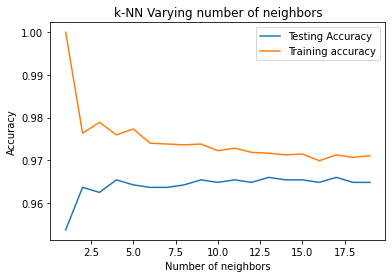

In [91]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [93]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=13)

In [94]:
# Fit the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=13)

In [95]:
knn.score(X_test,Y_test)

0.9659824046920821

In [96]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [97]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [98]:
# Let us get the predictions using the classifier we had fit above
Y_pred = knn.predict(X_test)

In [99]:
confusion_matrix(Y_test,Y_pred)

array([[1642,    2],
       [  56,    5]])

In [100]:
Y_pred_proba = knn.predict_proba(X_test)[:,1]

In [101]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_proba)

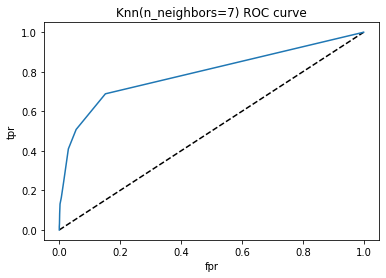

In [102]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [104]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_pred_proba)

0.7930377727254596

In [105]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
df.head()

,Actual,Predicted
313,0,0
6724,0,0
4494,0,0
5422,0,0
2754,0,0


In [77]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [78]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.9677372020921592

In [ ]:
knn_cv.best_params_

{'n_neighbors': 16}

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

In [ ]:
bag = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)

In [ ]:
bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [ ]:
bag.score(X_test,Y_test)

0.9642228739002933

In [ ]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':test_preds})
df